## Loading the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading the dataset

### Part 1

In [2]:
df = pd.read_csv('Position_Salaries.csv')

In [3]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


### Part 2

In [10]:
x = df.iloc[:, 1:-1].values #we regard the first column as unimportant, so we do not consider it in the features. That is why we have started from column 1, not 0.
y = df.iloc[:, -1].values

In [17]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [19]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [24]:
#So since we are going to do feature scaling on "y" in the next section, and since ".StandardScaler()" ONLY accepts 2D arrays for its input, then we have to reshape it to a 2D array.
#The reason why we are going to do feature scaling on "y" (!!) is mentioned in the next section as well.

print(y.shape)
print(x.shape)

y = y.reshape(len(y), 1)

(10,)
(10, 1)


In [30]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Missing data

In [31]:
#we do not have any missing data.

## Encoding categorical data

In [32]:
#we do not have any categorical data in x (remember that we excluded the first column from x).

## Train-test split

In [33]:
#since we have only few data, we do not do train-test-split.

## Feature Scaling

In [34]:
#We also have to apply feature scaling on "y", since when "y" (label) is much higher than the "x" (features) (which is the case in here), we MUST do feature scaling on "y". If we don't, the model WILL neglect these small features.  

from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [35]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [36]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Model

In [39]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf')
regressor.fit(x, y) #.fit() = training the class object on the specified dataset :))

c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

## Predicting a new result

In [49]:
#*choose the RIGHT scaler for 6.5! which is "sc_x"
#*since we ALSO scaled "y", the output of "regressor.predict(sc_x.fit_transform([[6.5]]))" is scaled too. So we MUST "inverse_transform" it! 

sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])))

array([131106.77303274])

## Visualising the SVR result

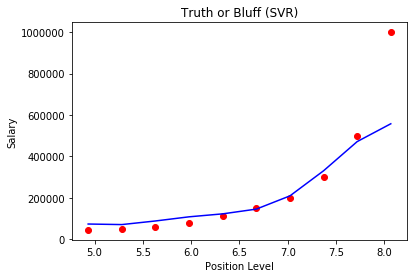

In [52]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

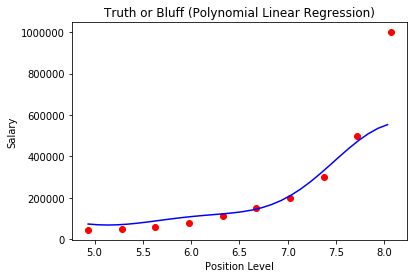

In [55]:
x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1) #0.1: step
x_grid = x_grid.reshape(len(x_grid), 1)

plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(x_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid))), color = 'blue')
plt.title('Truth or Bluff (Polynomial Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()